In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

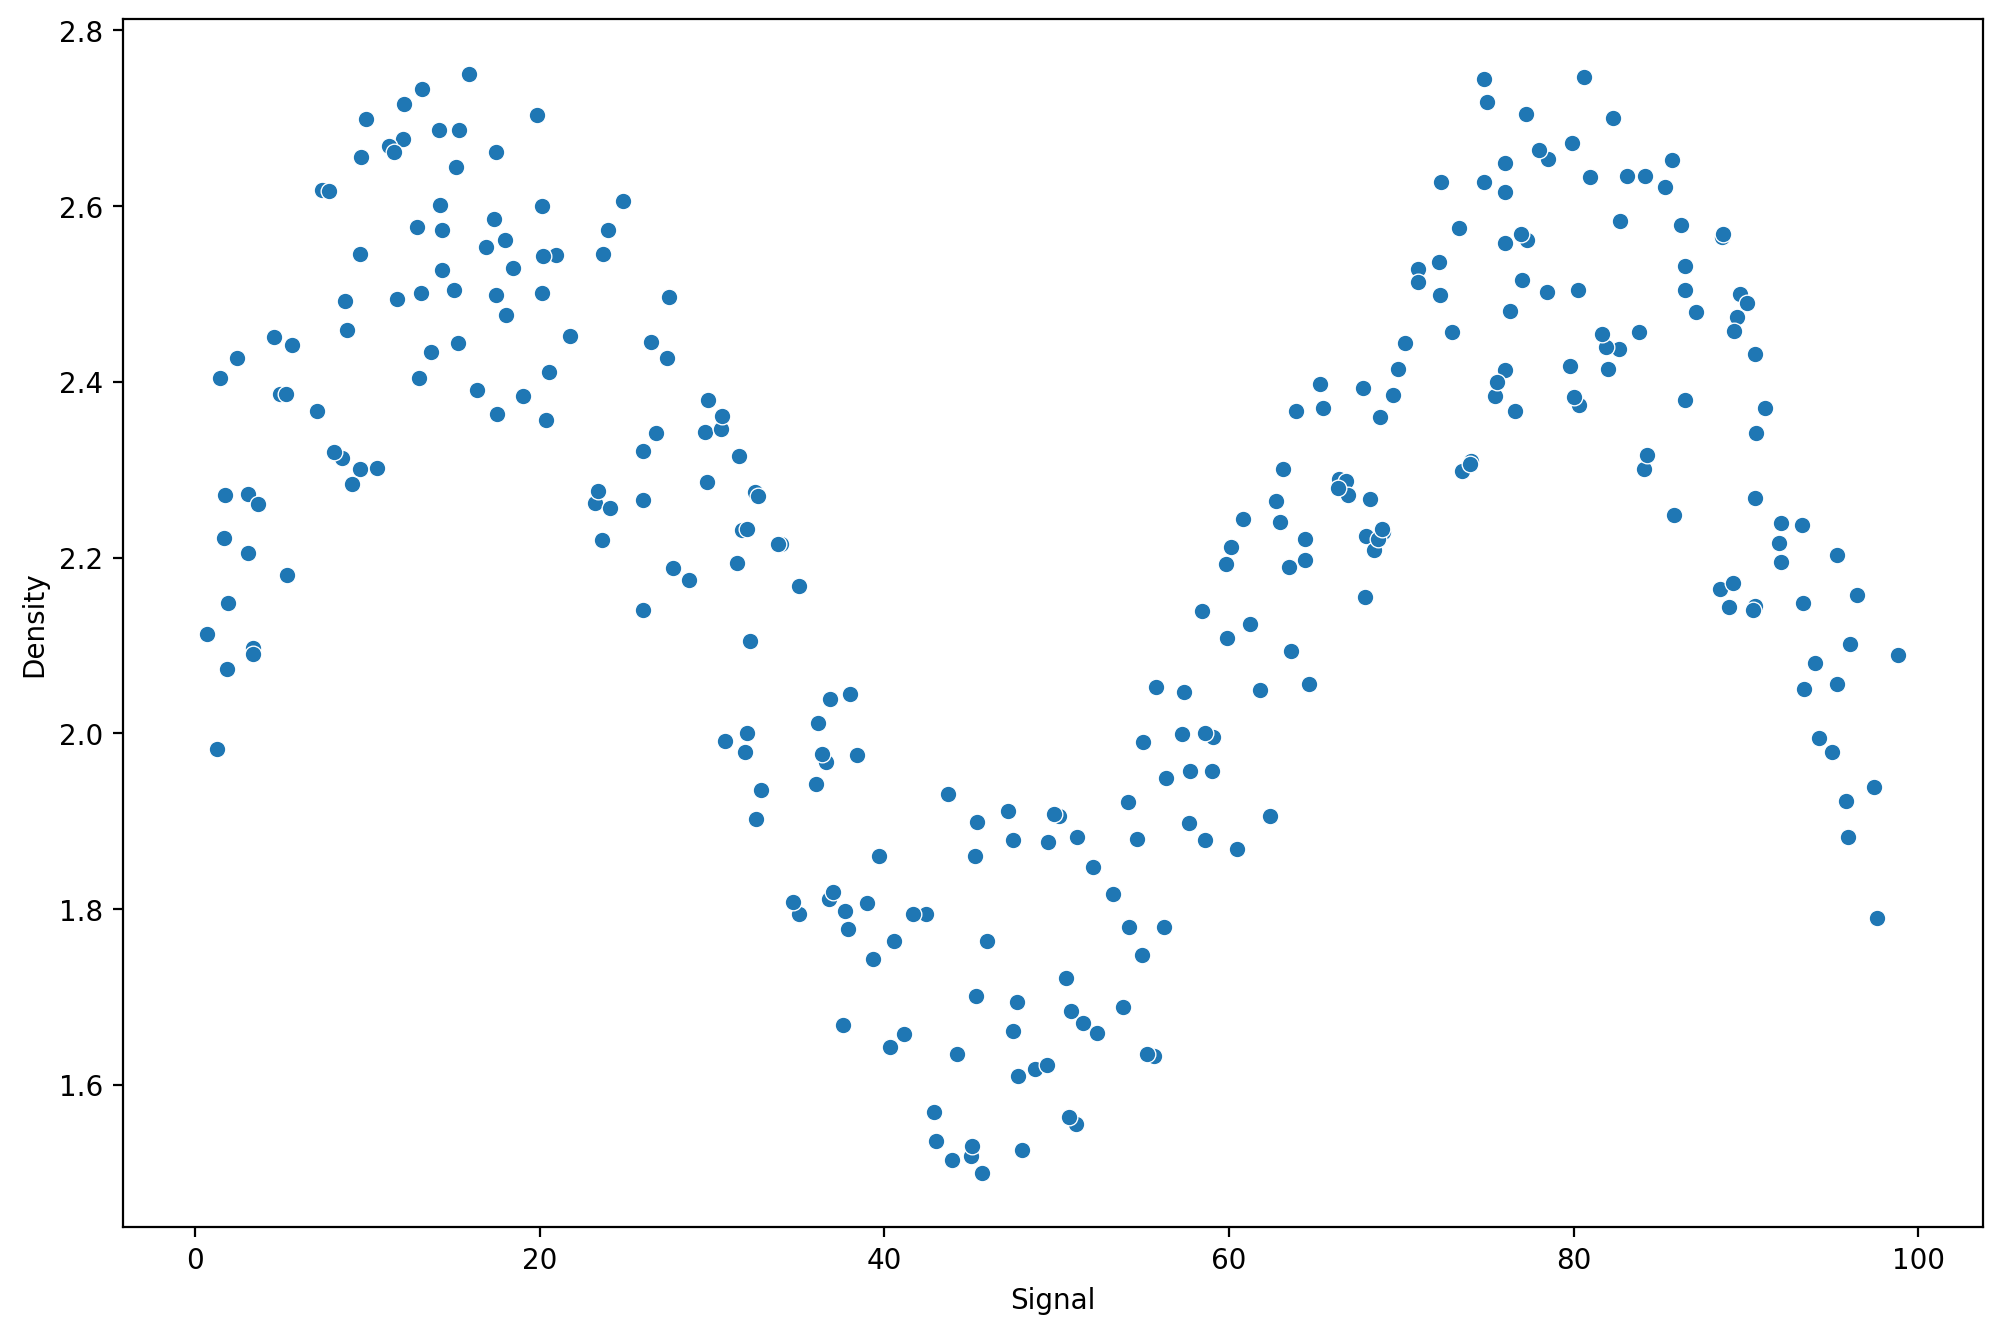

In [5]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [6]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
#1) linear regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model = LinearRegression()

In [11]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [12]:
lr_preds = lr_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.25700519965846297

In [15]:
signal_range = np.arange(0,100)

In [16]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

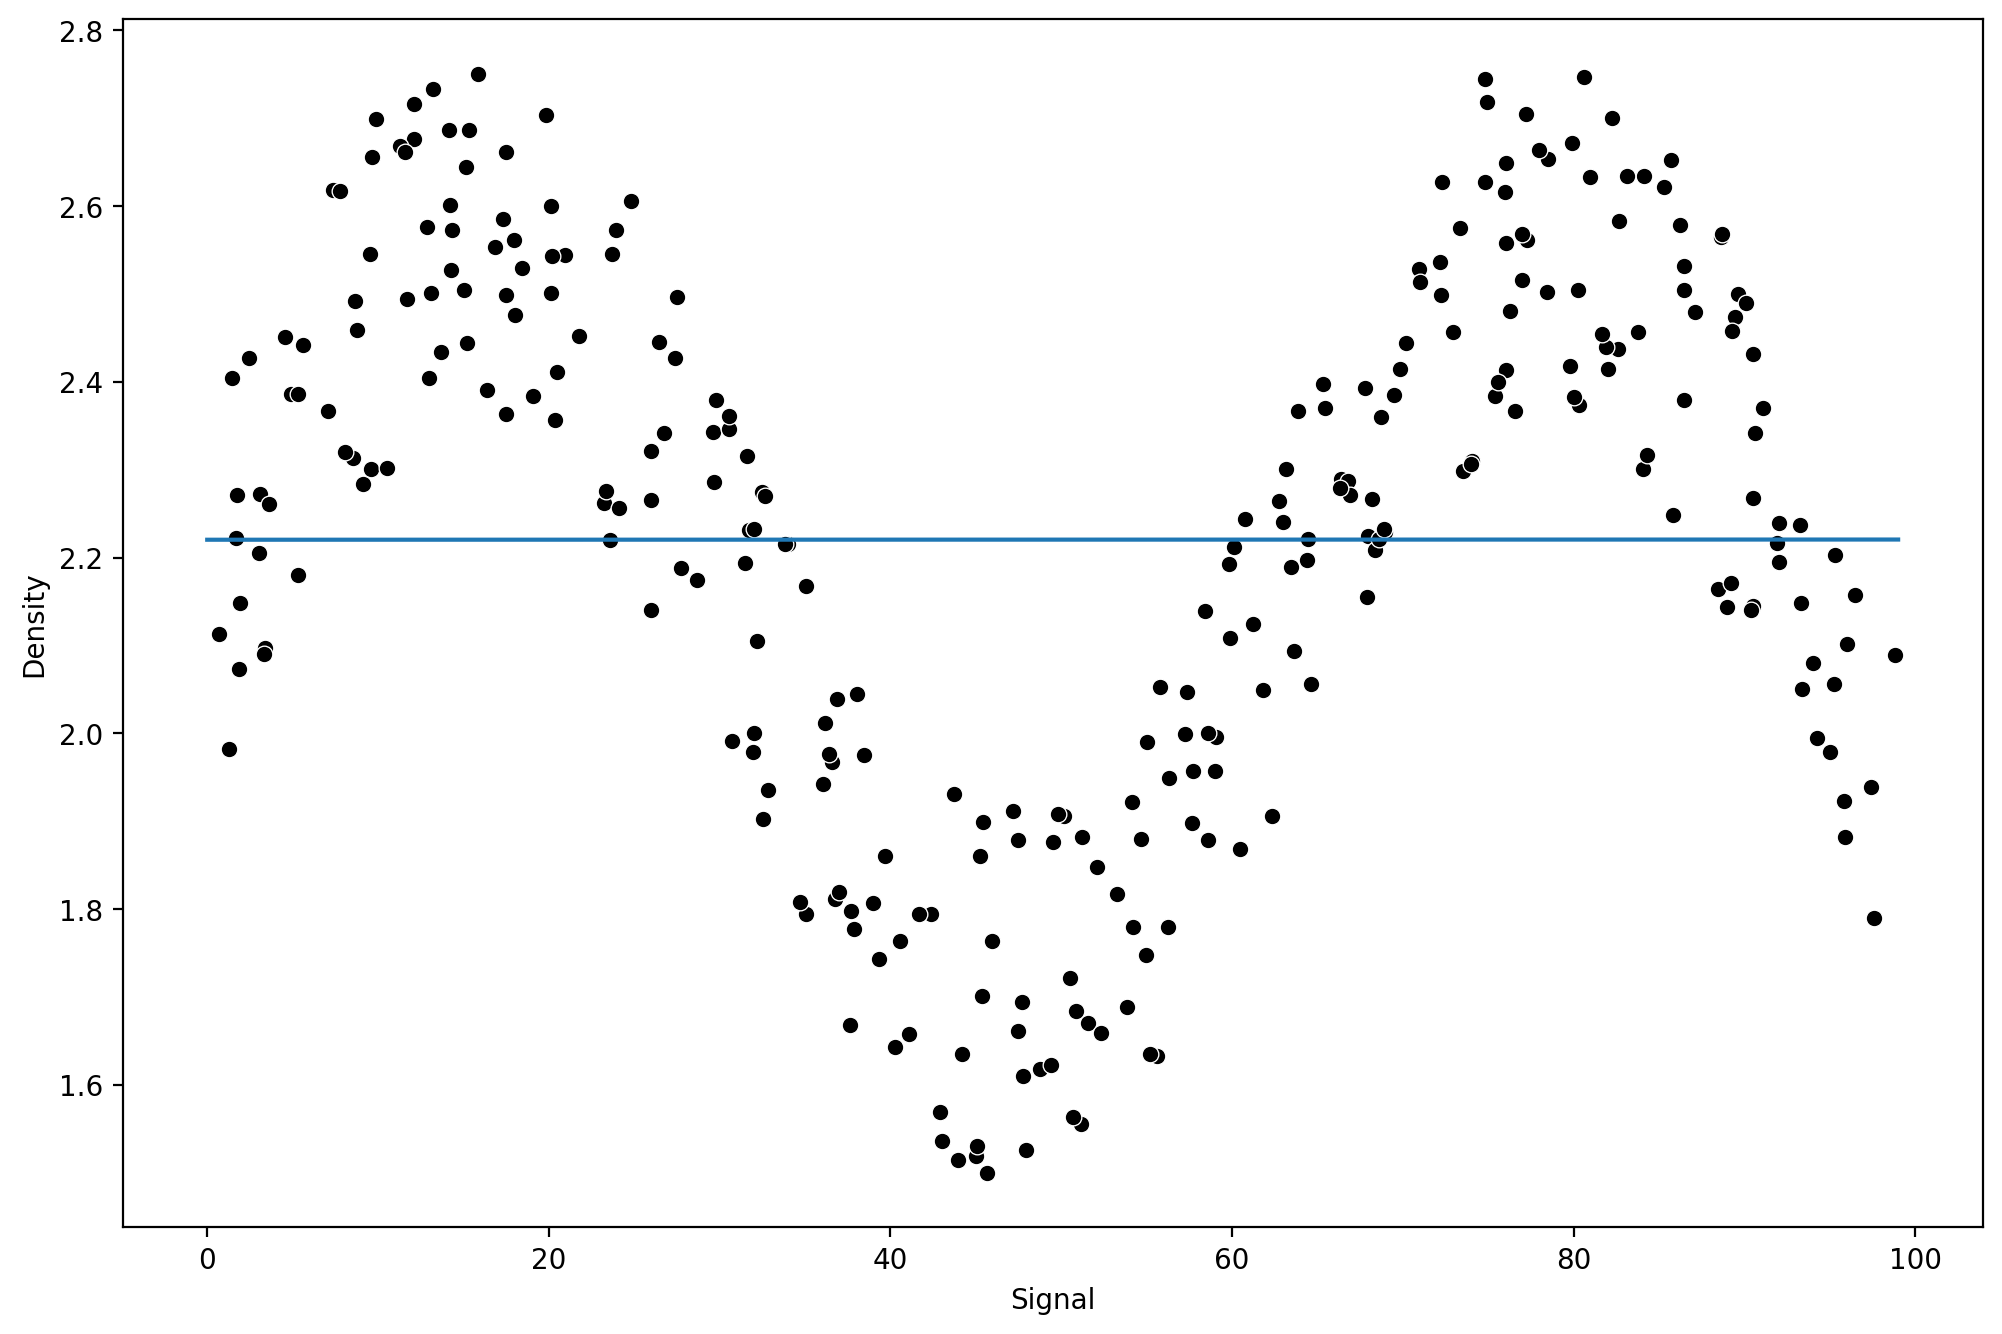

In [17]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

In [ ]:
#2) polynomial regression

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.25700519965846297


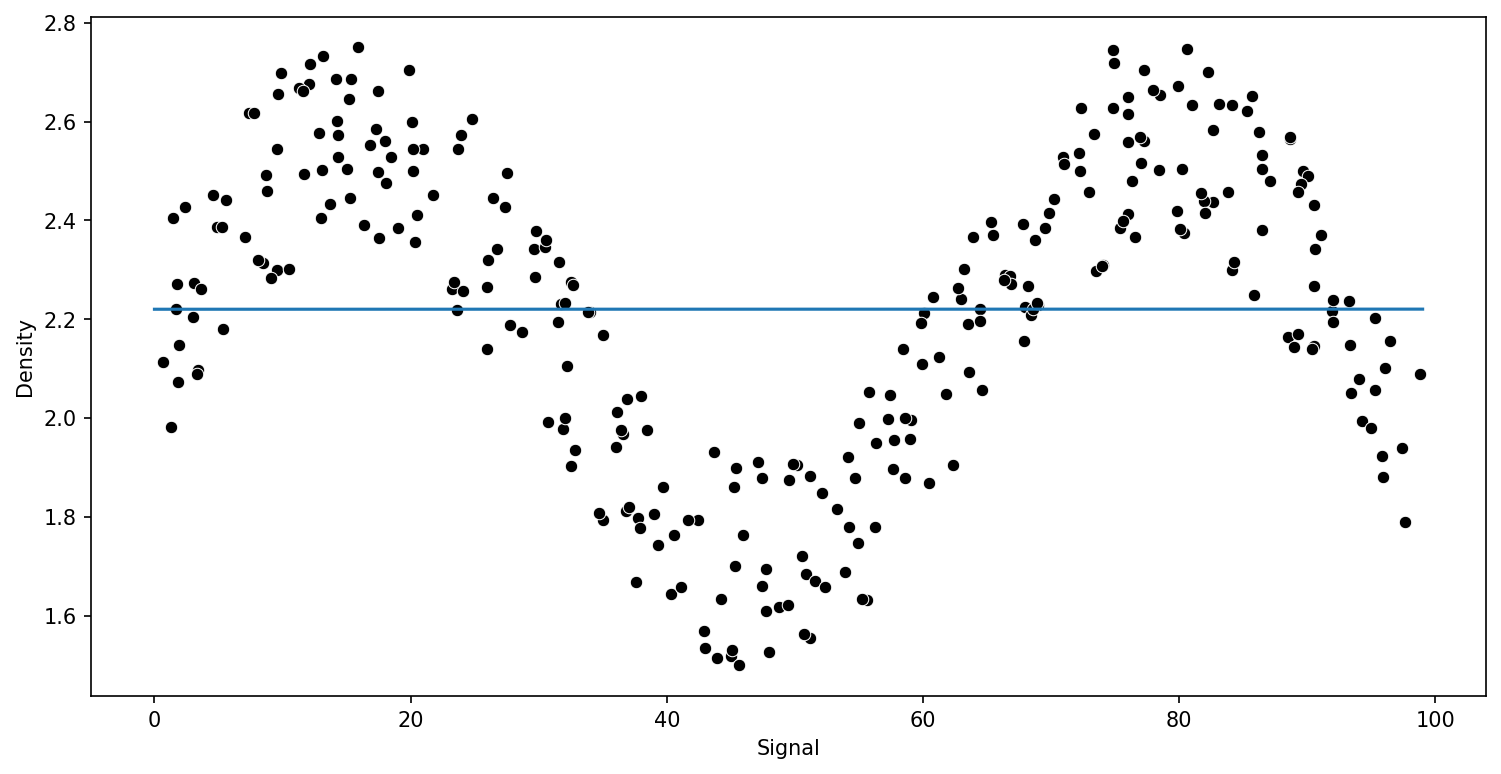

In [20]:
run_model(model,X_train,y_train,X_test,y_test)

In [21]:
from sklearn.pipeline import make_pipeline

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.28173095637255463


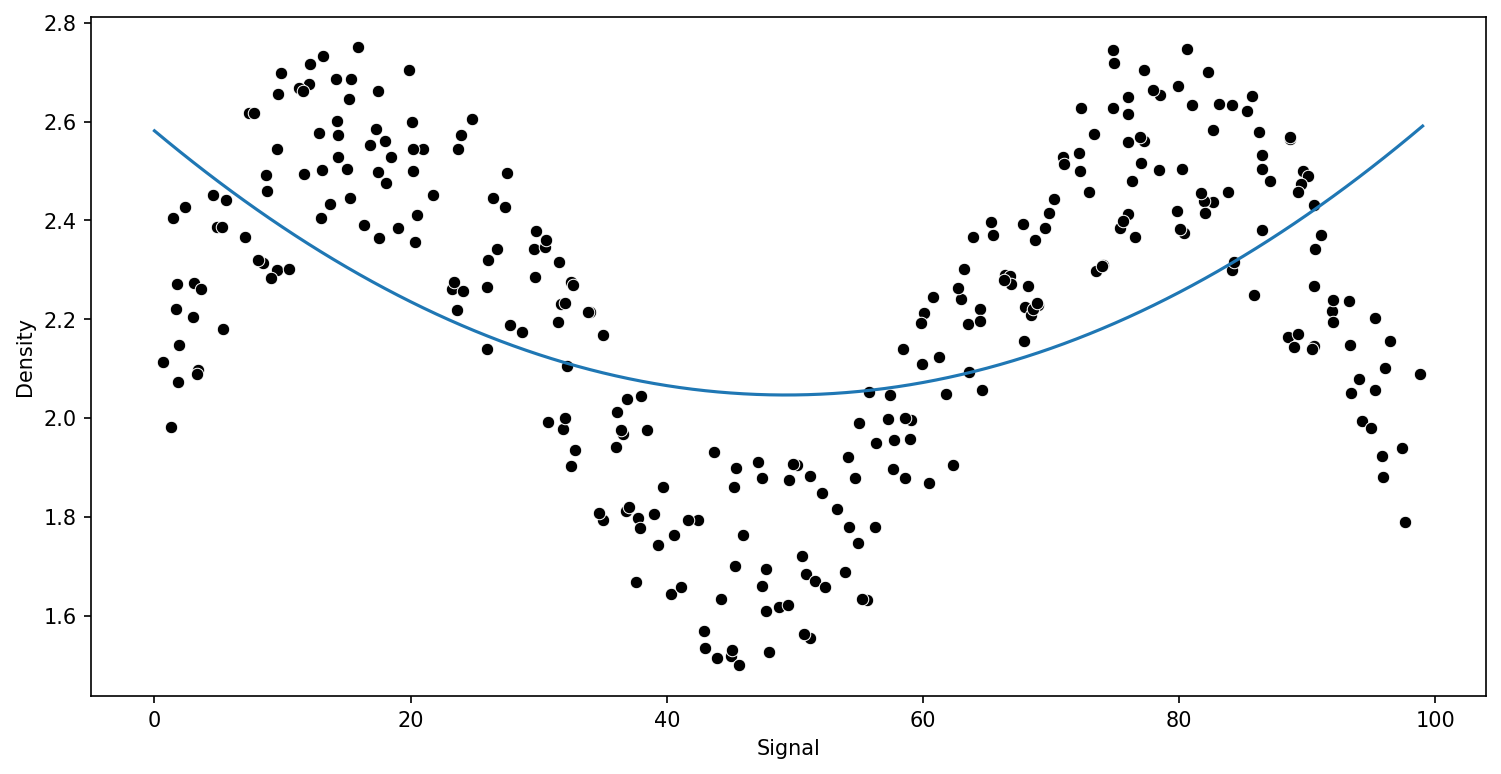

In [24]:
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14058746802488756


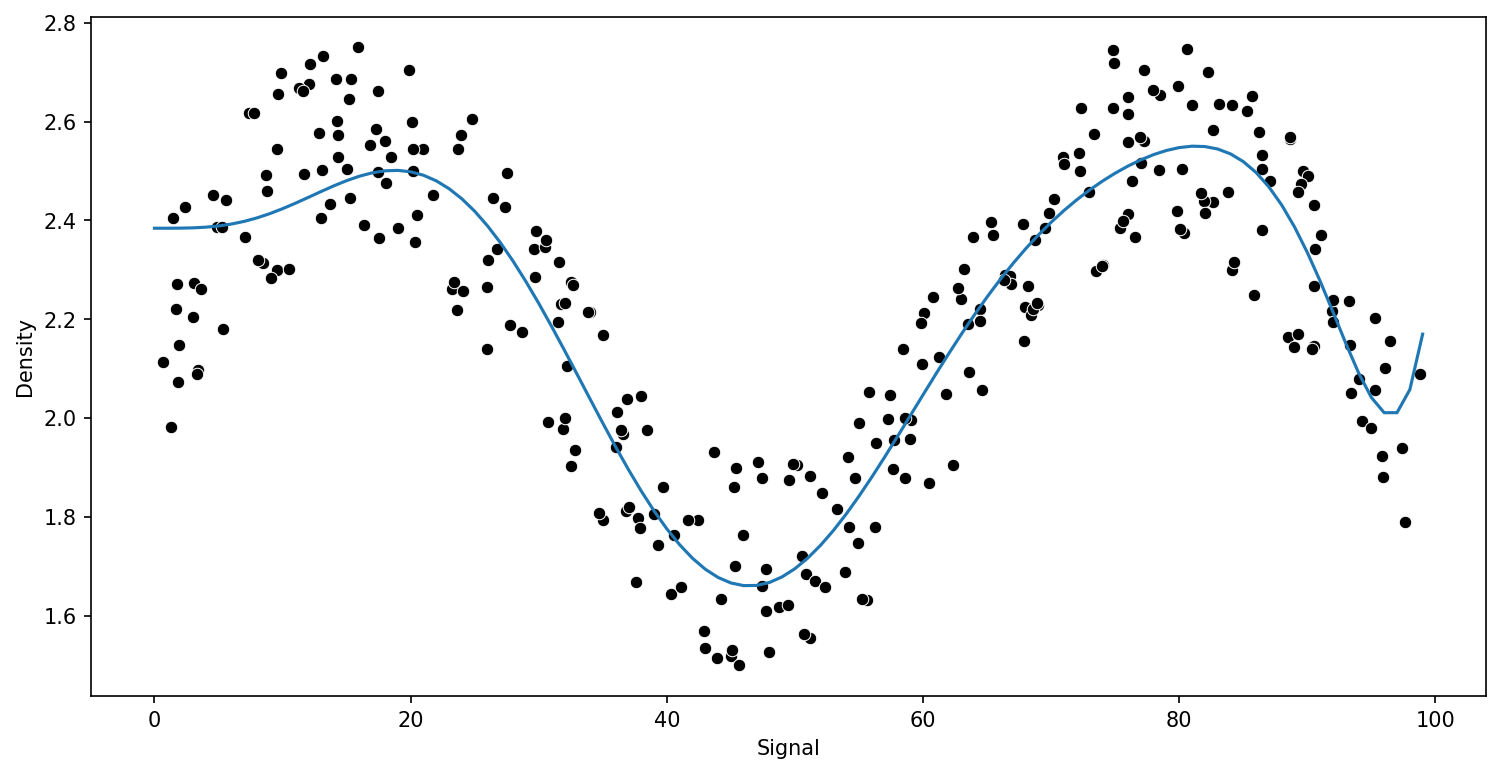

In [25]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

In [ ]:
#3) knn regression

In [26]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.15234870286353372
RMSE : 0.13730685016923655
RMSE : 0.13277855732740926


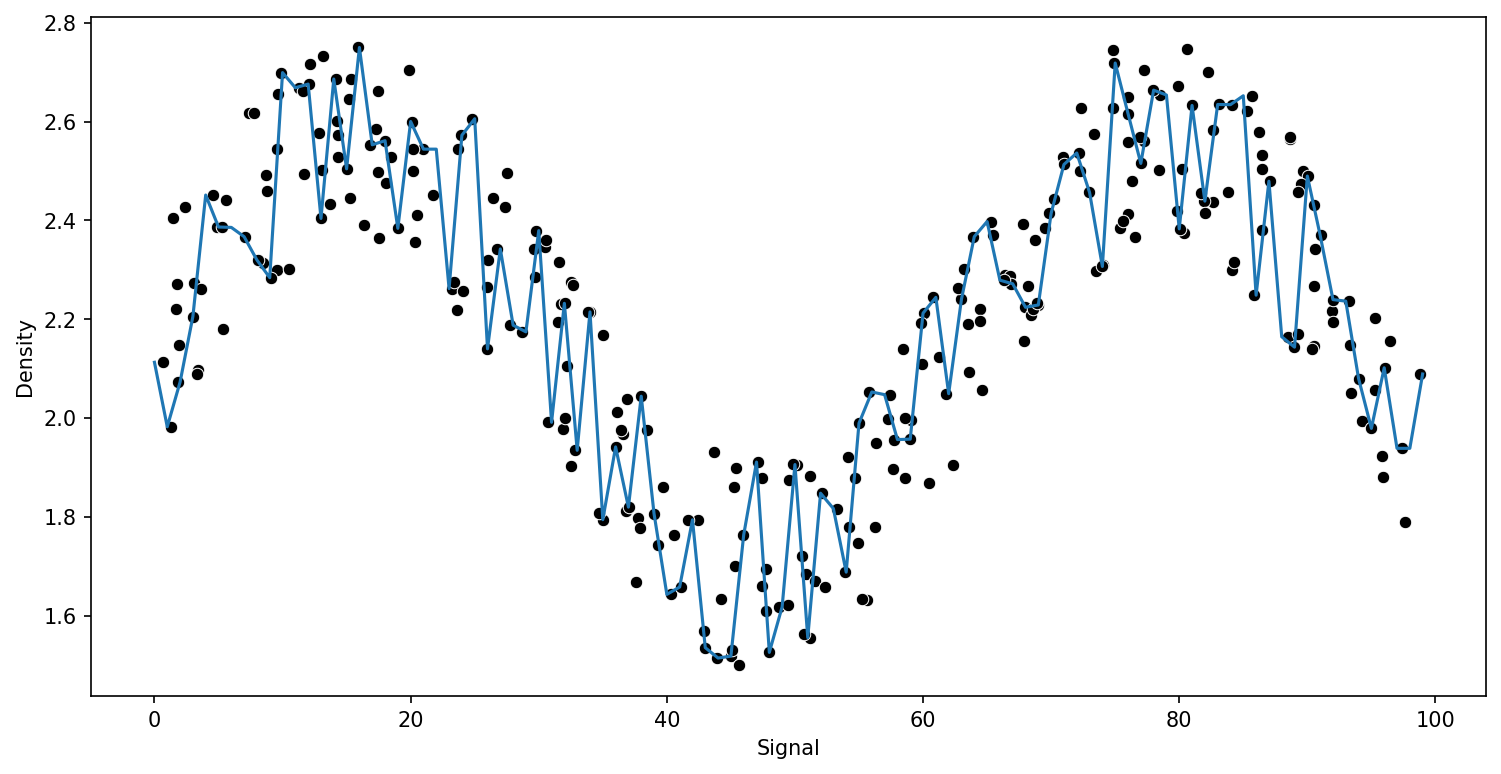

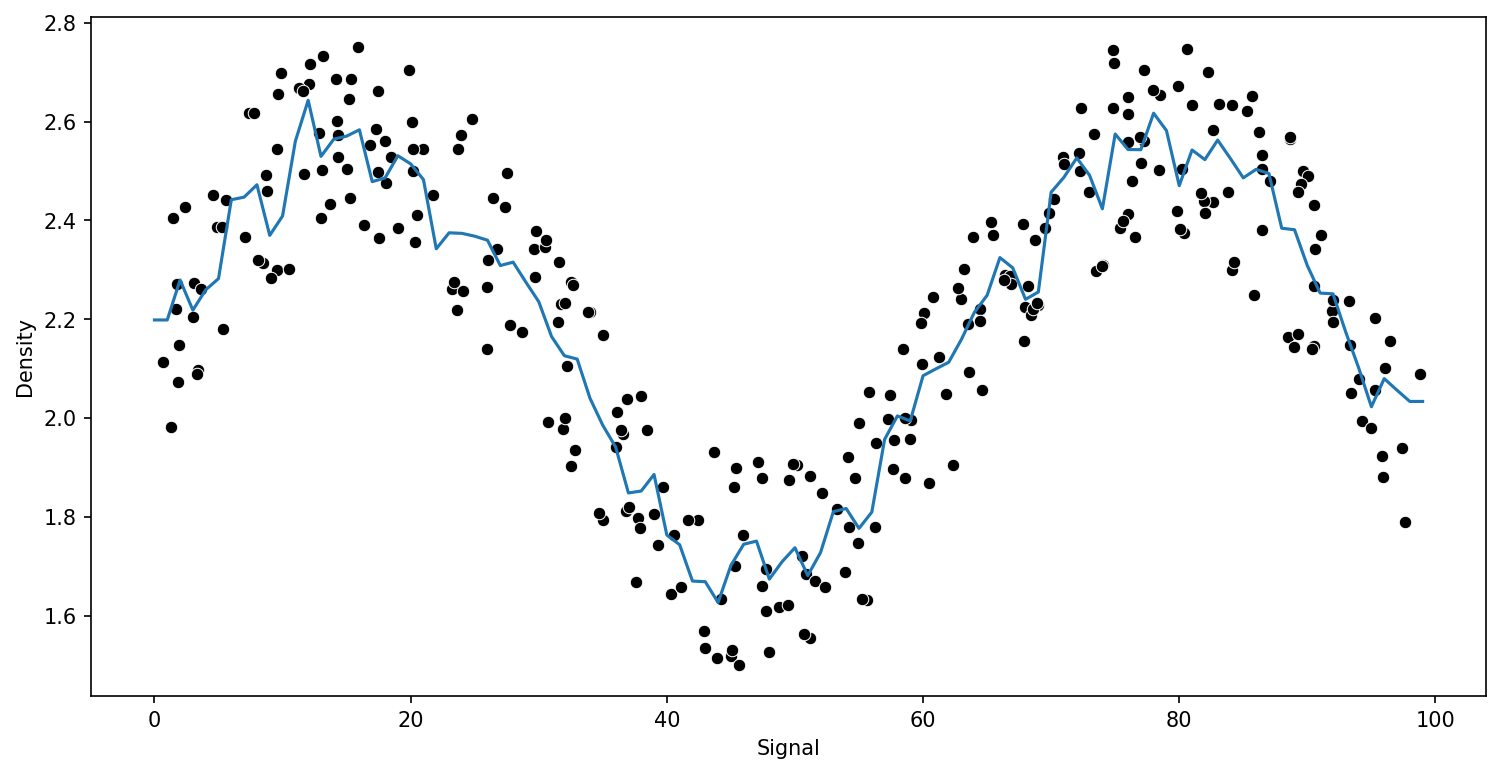

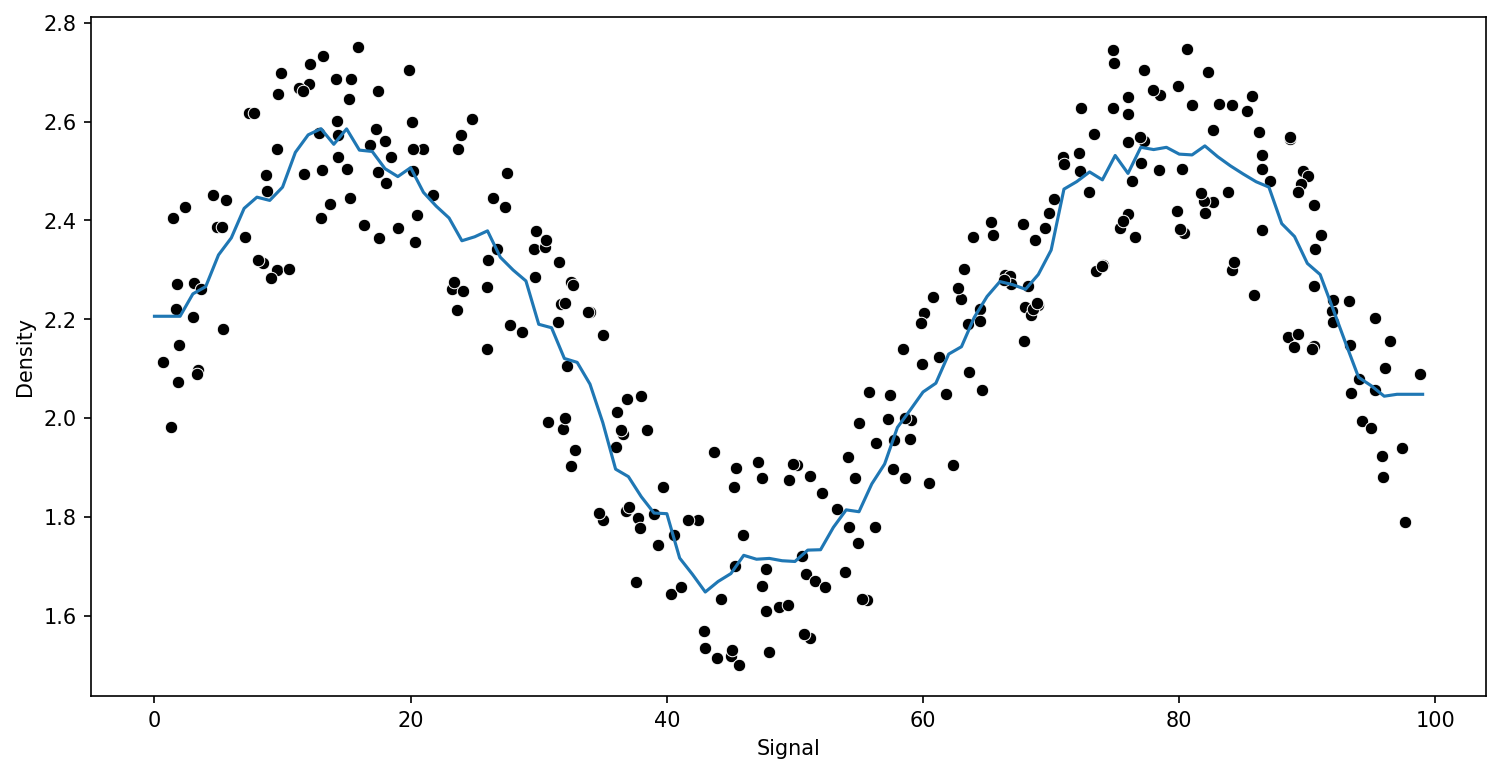

In [27]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
#4) Decision tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.15234870286353372


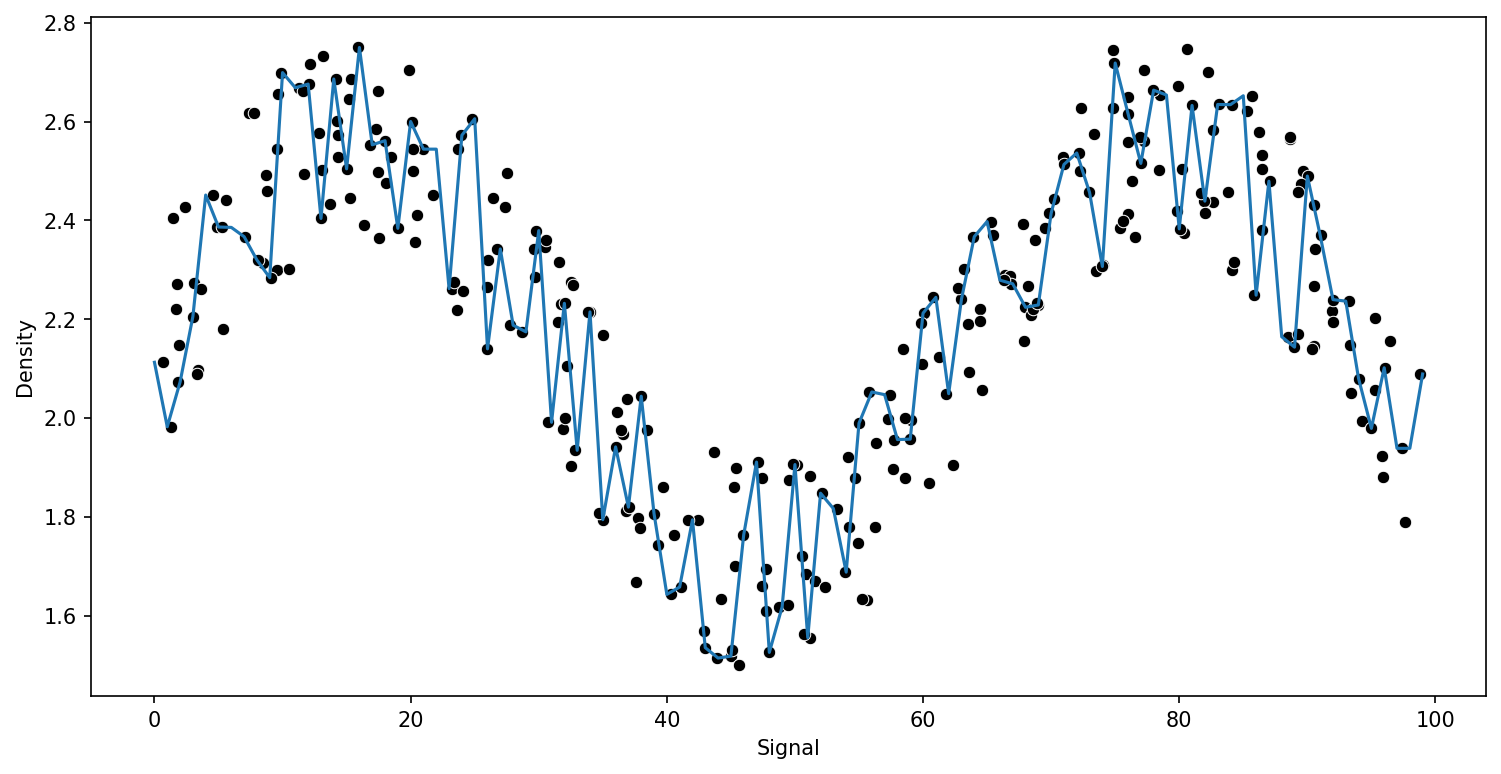

In [29]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [30]:
model.get_n_leaves()

270

In [ ]:
#5) support vector regression


In [34]:
from sklearn.svm import SVR

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [37]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12634668775105407


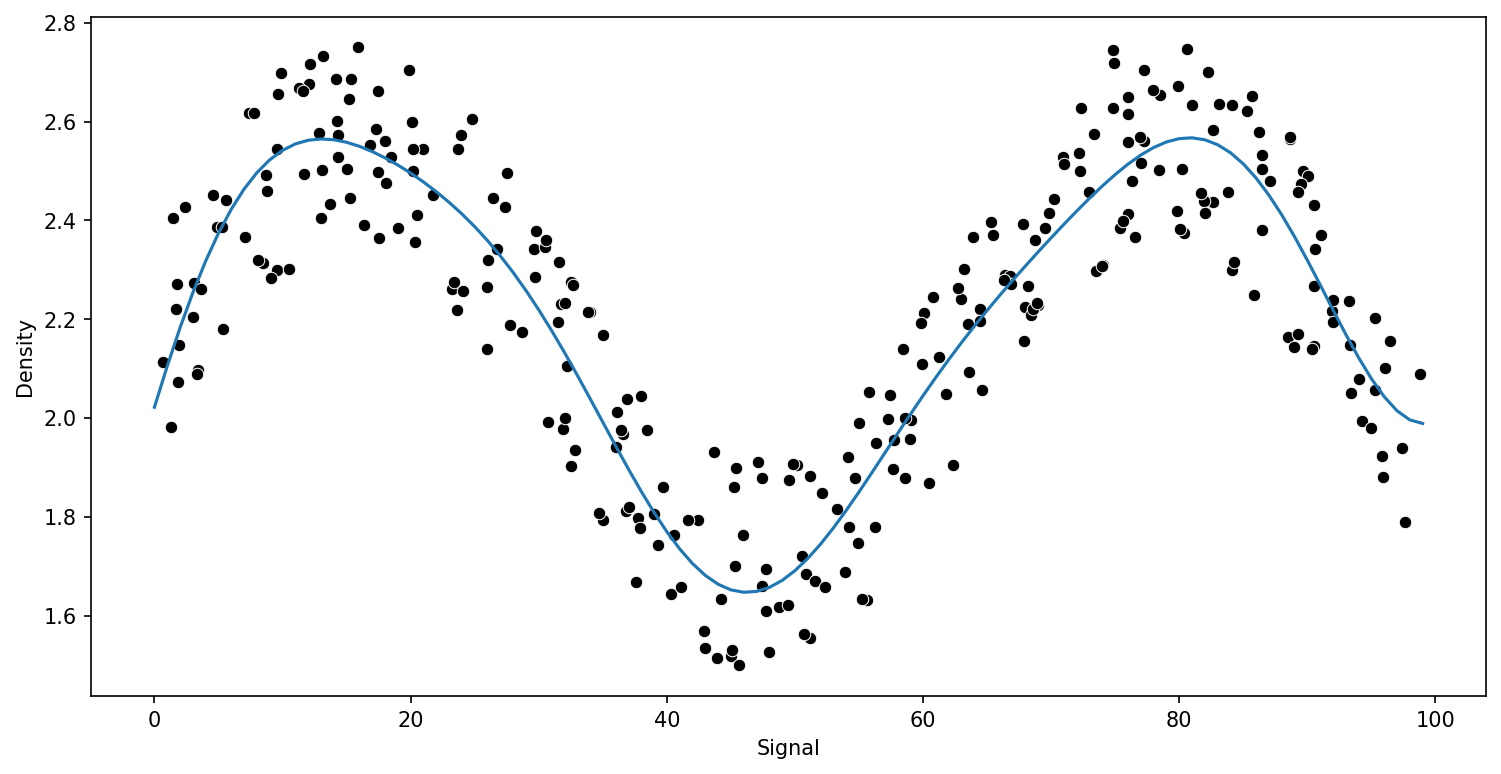

In [38]:
run_model(grid,X_train,y_train,X_test,y_test)

In [39]:
grid.best_estimator_

SVR(C=1000)

In [ ]:
#6) random forest regression

In [40]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.1332023710987364
RMSE : 0.13338395795919894
RMSE : 0.13161530575414176


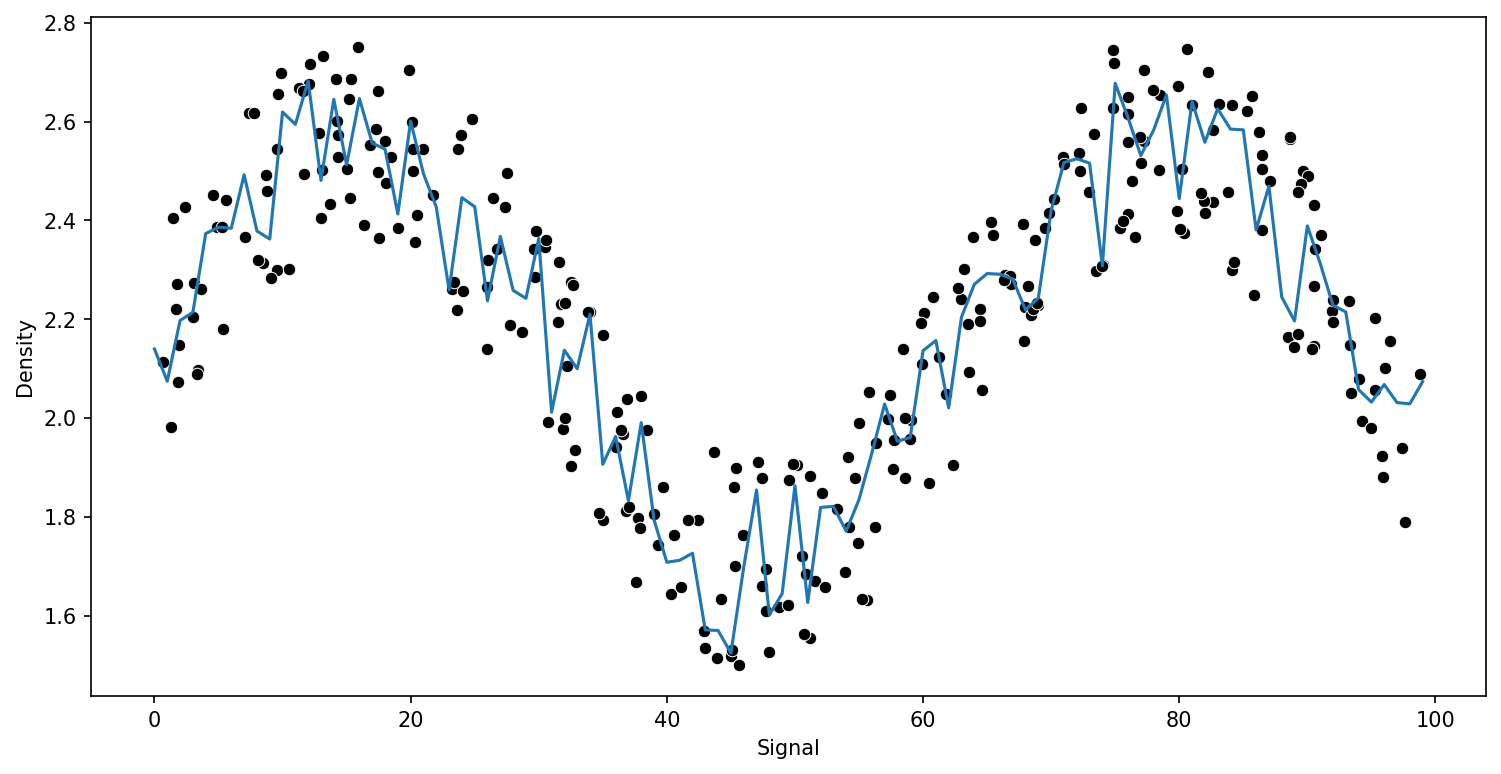

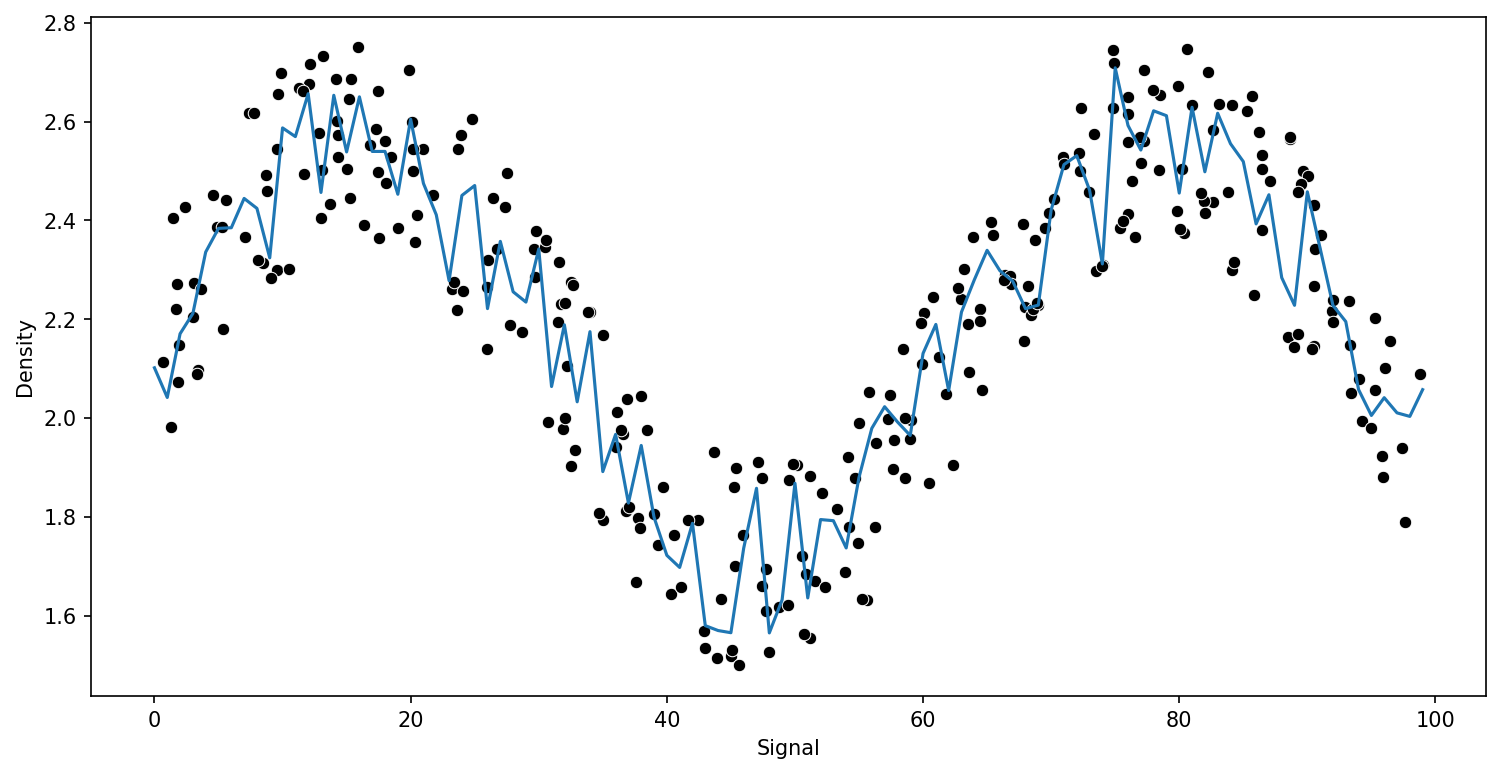

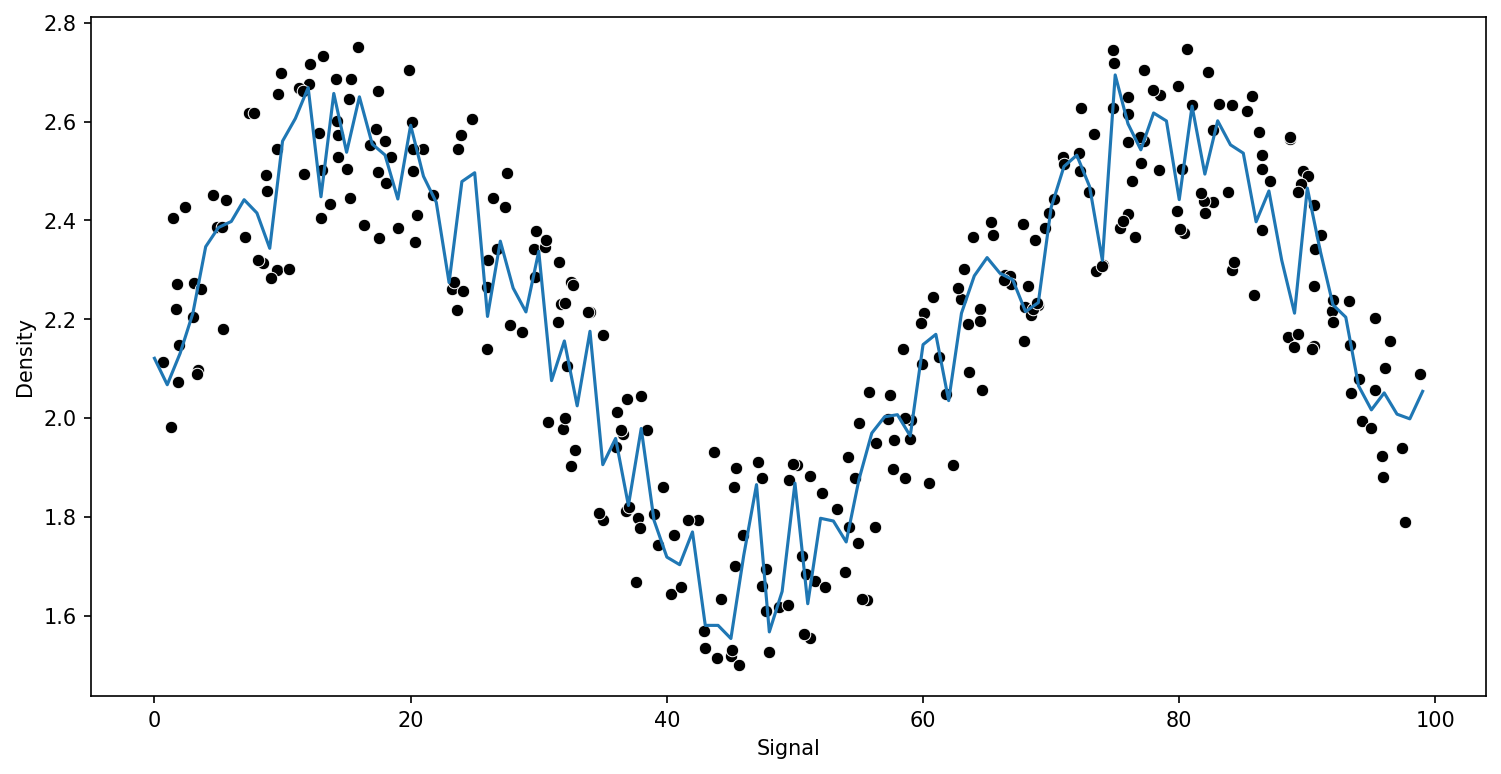

In [41]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
#7) gradient boosting

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |

RMSE : 0.13294148649584667


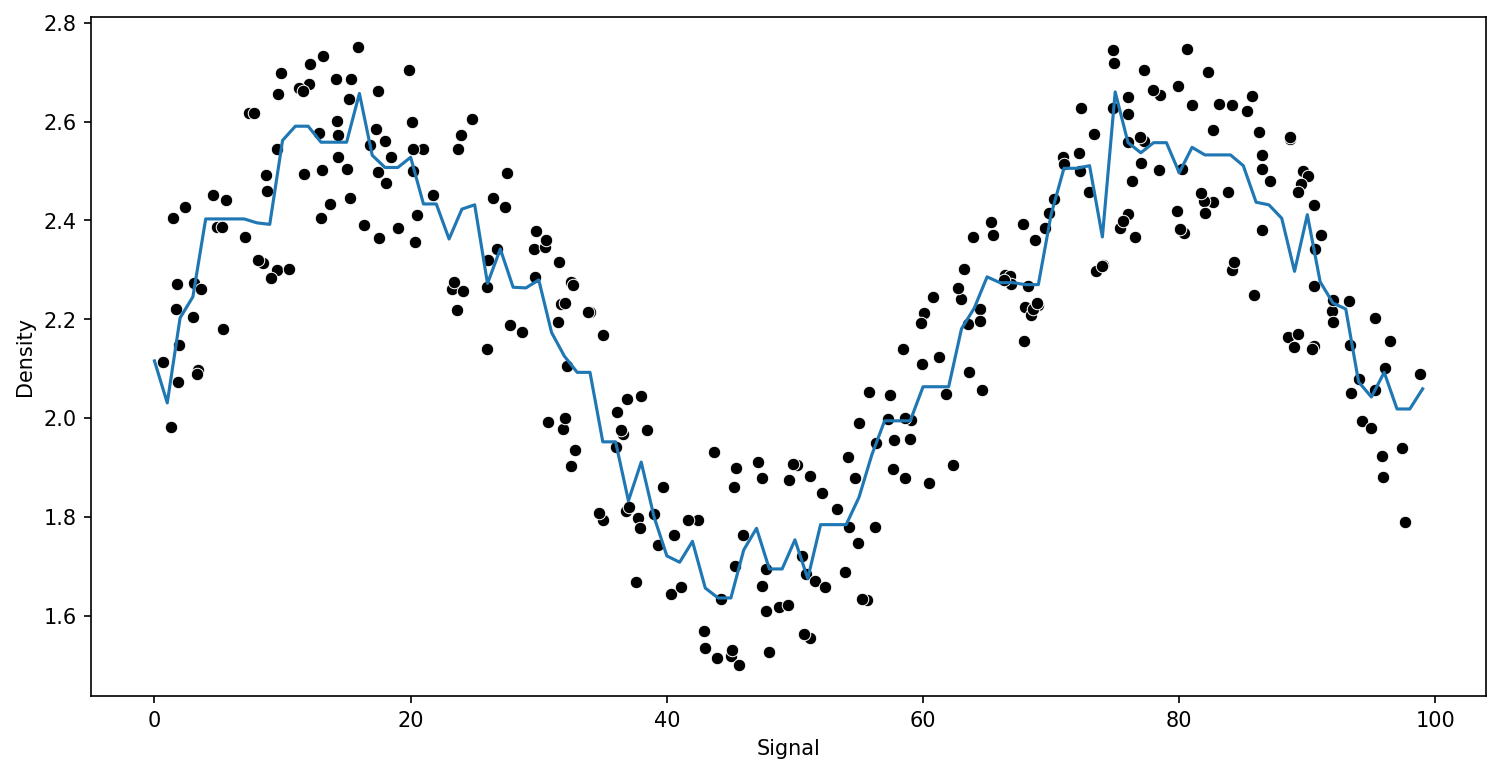

In [44]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
#8) Adaboost

In [45]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


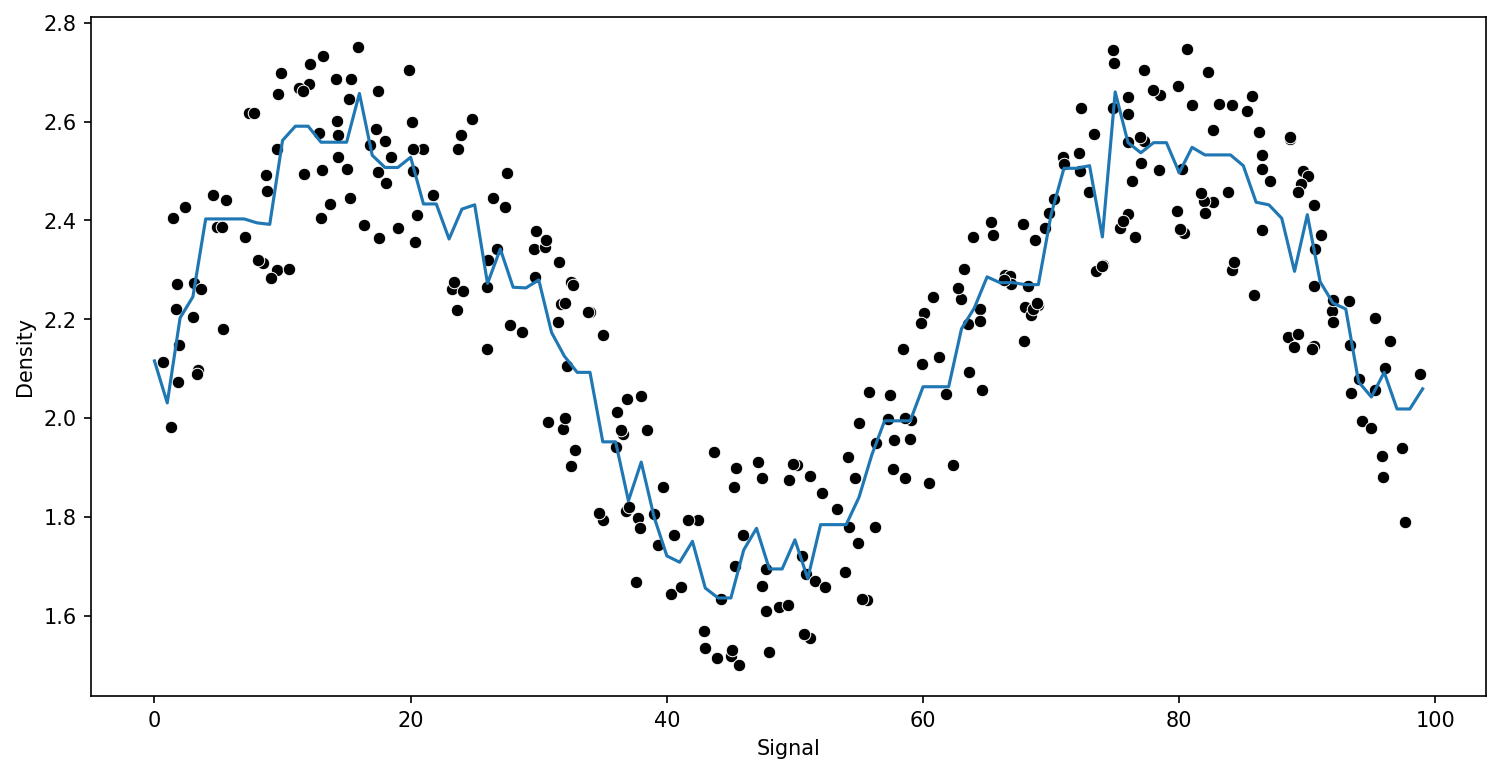

In [46]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)